In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
import matplotlib.cm as cm
import pandas as pd
import numpy as np

US distribution of HGH median accratio 

In [2]:
#read data
dfT=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=['census_block_group','population_by_age','percent_above_65'])

#homo
for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:
    df_=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv',
                       usecols=['census_block_group','demand_met_in_local'])
    
    df_=df_.rename(columns={'demand_met_in_local':key+'_accratio5m'})
    dfT=pd.merge(dfT,df_)
dfT['census_block_group']=dfT['census_block_group'].astype(str)
dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
            '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
            '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', 
            '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', 
            '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}
dfT['state']=dfT.apply(lambda x: dict_state[str(int(x['census_block_group'][0:2]))] if 
                                       len(x['census_block_group'])==12 else dict_state[str(int(x['census_block_group'][0:1]))],
                                       axis=1)

In [3]:
dfT['age']=dfT.apply(lambda x: 'greater than 0.5' if x['percent_above_65']>0.5 else 'less than or equal to 0.5',
                             axis=1)
dfT['is_old']=dfT.apply(lambda x: 1 if x['percent_above_65']>0.5 else 0,
                             axis=1)

In [4]:
dfT

,census_block_group,population_by_age,percent_above_65,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,age,is_old
0,10010201001,745,0.036242,0.574468,0.786667,0.625000,AL,less than or equal to 0.5,0
1,10010201002,1265,0.114625,0.280000,0.443709,0.286689,AL,less than or equal to 0.5,0
2,10010202001,960,0.161458,0.655172,0.809524,0.694611,AL,less than or equal to 0.5,0
3,10010202002,1236,0.094660,0.666667,0.702128,0.741007,AL,less than or equal to 0.5,0
4,10010203001,2364,0.134095,0.292135,0.696629,0.438953,AL,less than or equal to 0.5,0
...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,0.226927,0.000000,1.000000,0.615385,PR,less than or equal to 0.5,0
220329,721537506012,2703,0.107658,0.181818,0.666667,0.257143,PR,less than or equal to 0.5,0
220330,721537506013,1195,0.057741,0.000000,1.000000,0.200000,PR,less than or equal to 0.5,0
220331,721537506021,2005,0.220449,2.000000,2.000000,0.277778,PR,less than or equal to 0.5,0


In [102]:
dfS=pd.DataFrame()
dfS['state']=dfT['state'].unique()
dfS['population']=dfS.apply(lambda x:sum(dfT[dfT['state']==x['state']]['population_by_age'] ),axis=1)
dfS['HCS']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Health Care Services_accratio5m']<1.001)]
                                         ['Health Care Services_accratio5m']),axis=1)
dfS['GFS']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Grocery and Food Supply_accratio5m']<1.001)]
                                         ['Grocery and Food Supply_accratio5m']),axis=1)
dfS['HRE']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Housing and Real Estate_accratio5m']<1.001)]
                                         ['Housing and Real Estate_accratio5m']),axis=1)

In [103]:
dfS['num_old_cbg']=dfS.apply(lambda x: len (dfT[(dfT['state']==x['state'])&(dfT['is_old']==1)])
                                         ,axis=1)

In [104]:
dict_state_posi={ 'AL':(5,6),
                  'AK':(6,1),  
                  'AZ':(4,1),
                  'AR':(4,4), 
                 'CA':(3,0), 
                 'CO':(3,2), 
                 'CT':(2,9), 
                 'DE':(3,9), 
                 'DC':(4,8),
                 'FL':(6,8), 
                 'GA':(5,7), 
                 'HI':(6,0), 
                 'ID':(1,1),
                 'IL':(1,5),
                 'IN':(2,5), 
                 'IA':(2,4), 
                 'KS':(4,3), 
                 'KY':(3,5), 
                 'LA':(5,4), 
                 'ME':(0,10), 
                 'MD':(3,8), 
                 'MA':(1,9), 
                 'MI':(1,6), 
                 'MN':(1,4), 
                 'MS':(5,5), 
                 'MO':(3,4),
                 'MT':(1,2), 
                 'NE':(3,3),
                 'NV':(2,1), 
                 'NH':(0,9),
                 'NJ':(2,8), 
                 'NM':(4,2), 
                 'NY':(1,8),
                 'NC':(4,6),
                 'ND':(1,3), 
                 'OH':(2,6),
                 'OK':(5,3), 
                 'OR':(2,0),
                 'PA':(2,7), 
                 'RI':(2,10), 
                 'SC':(4,7), 
                 'SD':(2,3),
                 'TN':(4,5), 
                 'TX':(6,3),
                 'UT':(3,1), 
                 'VT':(0,8), 
                 'VA':(3,7), 
                 'WA':(1,0), 
                 'WV':(3,6),
                 'WI':(0,5), 
                 'WY':(2,2)}

In [105]:
dfS

,state,population,HCS,GFS,HRE,num_old_cbg
0,AL,4841164,0.236399,0.430556,0.217899,10
1,AK,736855,0.523158,0.561404,0.447368,0
2,AZ,6728577,0.415663,0.620690,0.546548,274
3,AR,2968472,0.250000,0.420807,0.087248,13
4,CA,38654206,0.489362,0.661652,0.542169,221
5,CO,5359295,0.459459,0.618846,0.561404,18
6,CT,3588570,0.478261,0.619048,0.514803,18
7,DE,934695,0.428571,0.537500,0.455702,19
8,DC,659009,0.600000,0.615385,0.327856,0
9,FL,19934451,0.470588,0.627358,0.565789,856


In [106]:
colors=['#EBEBEB','#D0DCE8','#B5CBE2','#98A3CA','#455D99']

accmax=max([max(dfS['HCS']),max(dfS['GFS']),max(dfS['HRE'])])
accmin=min([min(dfS['HCS']),min(dfS['GFS']),min(dfS['HRE'])])

# 创建颜色映射 cmap_for_us_spatial_dis_aaccraatio =ListedColormap(colors)
cmap_for_us_spatial_dis_aaccraatio= plt.cm.colors.LinearSegmentedColormap.from_list('my_cmap', colors,N=100)
norm = plt.Normalize(accmin, accmax)


In [107]:
popmax=max(dfS['population'])
popmin=min(dfS['population'])
print(popmin,popmax)

583029 38654206


C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\2649620594.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\2649620594.py:83: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cbar=fig.colorbar(ax2.imshow([[]],cmap=cmap_for_us_spatial_dis_aaccraatio),ax=ax2,orientation='vertical',norm=norm)


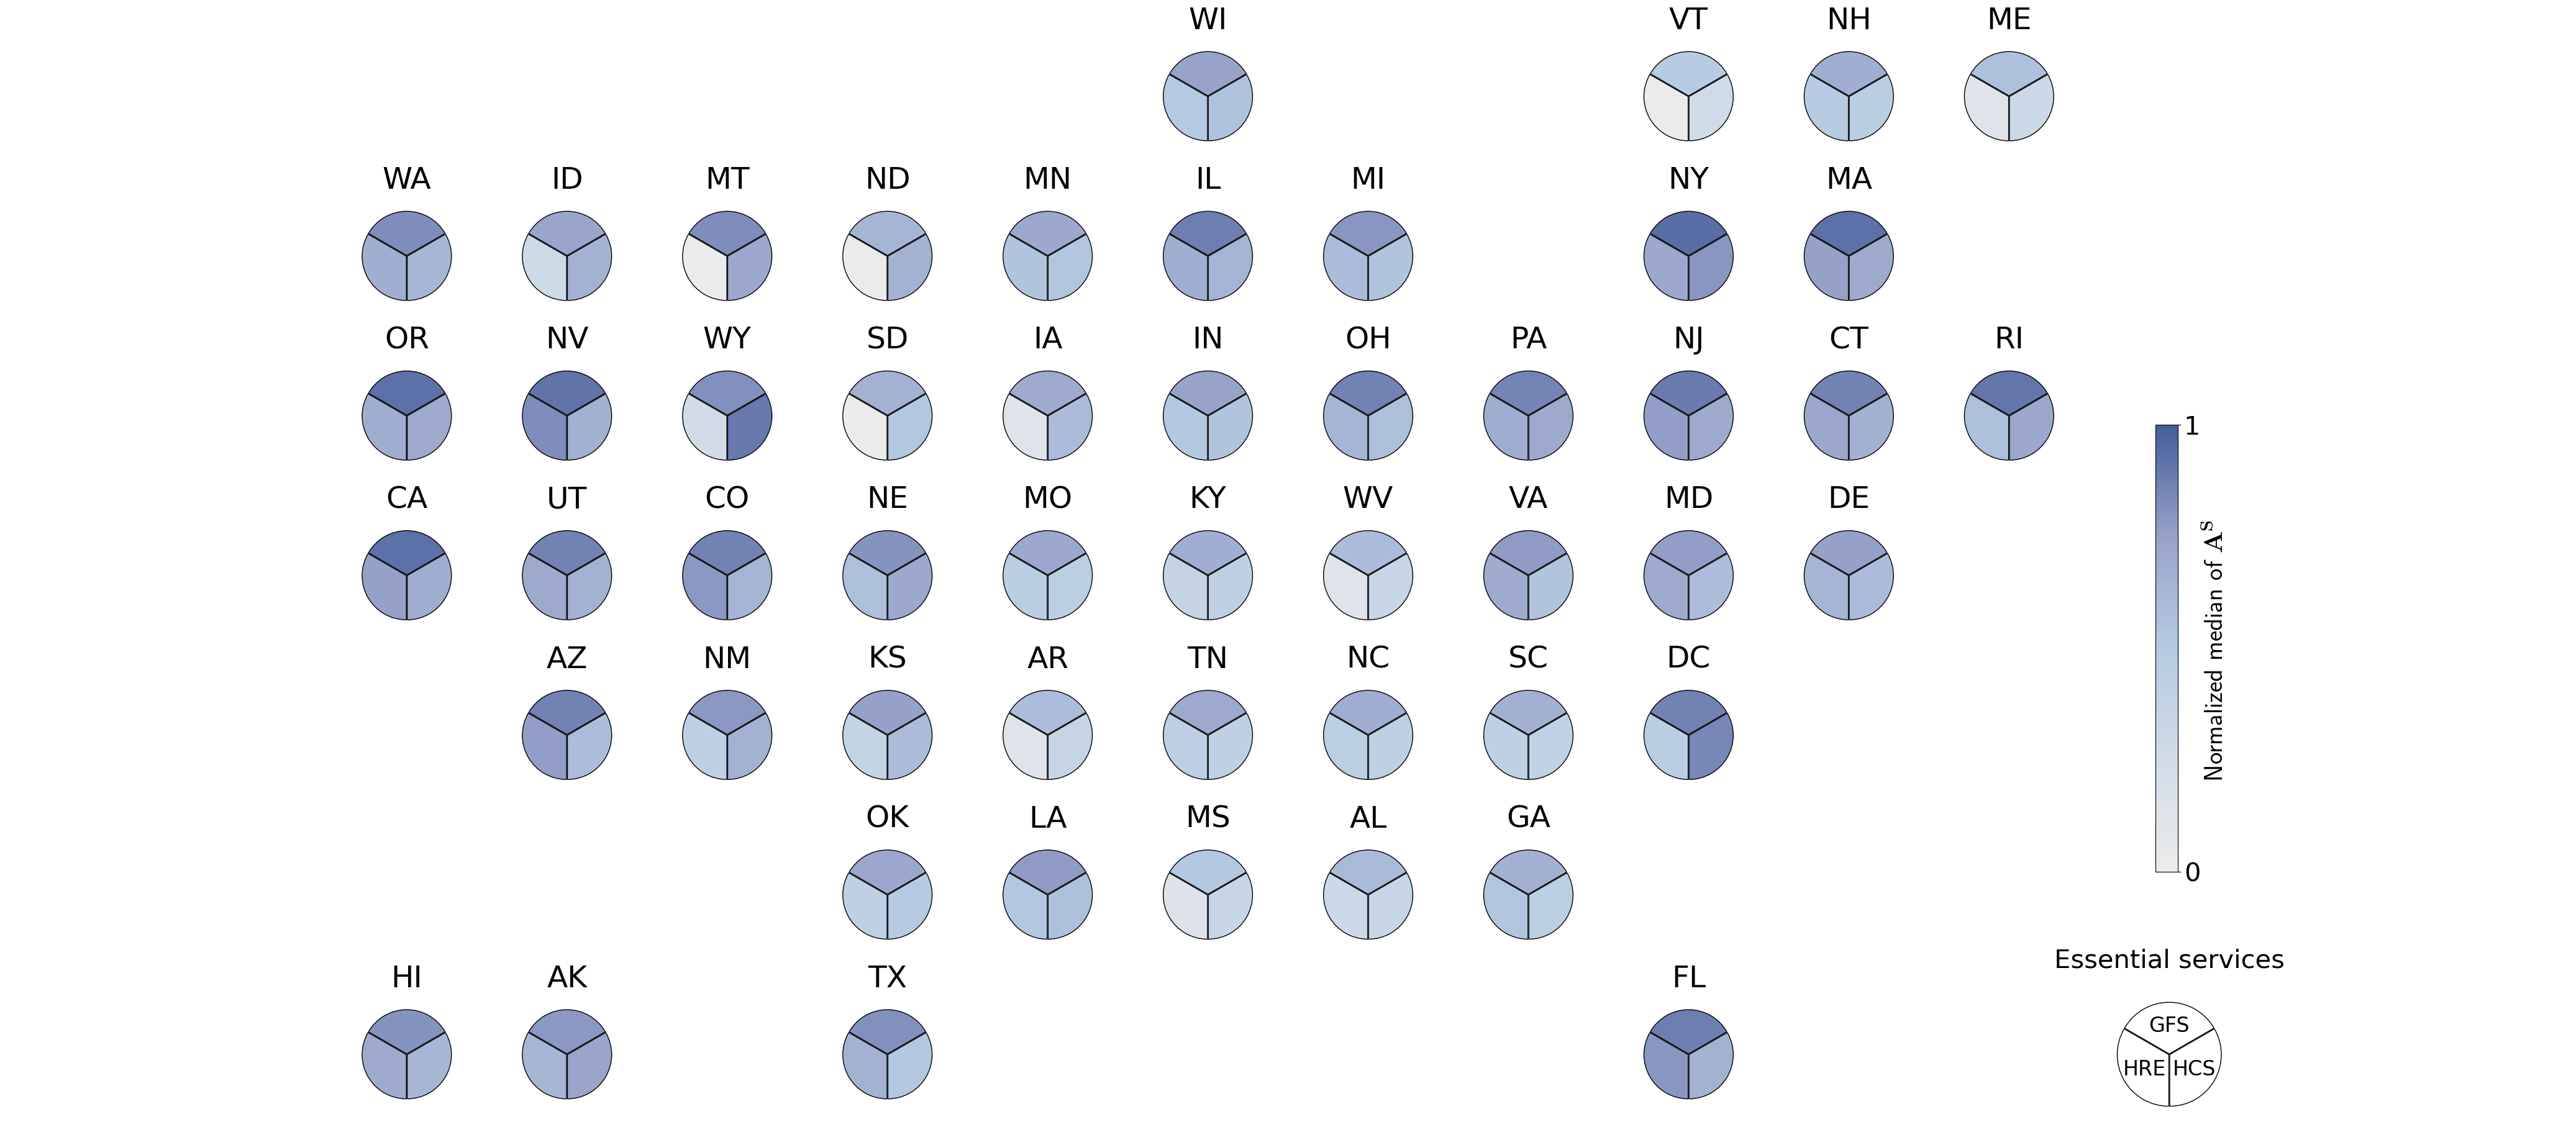

In [108]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#blues:['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58']
colors=['#EBEBEB','#D0DCE8','#B5CBE2','#98A3CA','#455D99']

accmax=max([max(dfS['HCS']),max(dfS['GFS']),max(dfS['HRE'])])
accmin=min([min(dfS['HCS']),min(dfS['GFS']),min(dfS['HRE'])])

popmax=max(dfS['population'])
popmin=min(dfS['population'])


# 创建颜色映射 cmap_for_us_spatial_dis_aaccraatio =ListedColormap(colors)
cmap_for_us_spatial_dis_aaccraatio= plt.cm.colors.LinearSegmentedColormap.from_list('my_cmap', colors,N=100)
norm = plt.Normalize(accmin, accmax)

def value_to_color(value):
    # Clamp value between 0 and 1
    #value = max(0, min(1, value))
    # Get the 'cividis' colormap
    
    
    cmap =cmap_for_us_spatial_dis_aaccraatio  #cm.get_cmap('summer')
    # Map value to colormap
    color = cmap(norm(value))
    return color

def radius(col):
    p=col['population']
    
   
    
    p0=popmin
    p1=popmax
    
    r0=0.4+0.15
    r1=0.9+0.15
    
     
    rr=r0+(p-p0)*(r1-r0)/(p1-p0)
    
    p=np.log(col['population'])
    p0=np.log(popmin)
    p1=np.log(popmax)    
    rlog=r0+(p-p0)*(r1-r0)/(p1-p0)
    
    
    rconst=0.9
    
    return rconst
    
dfS['radius']=dfS.apply(radius,axis=1)


fig, ax=plt.subplots(7,12,constrained_layout=True, figsize=(42, 18))#
fig.tight_layout()
for state in dict_state_posi.keys():
    row=dict_state_posi[state][0]
    col=dict_state_posi[state][1]
    HCS=dfS[dfS['state']==state]['HCS'].iat[0]
    GFS=dfS[dfS['state']==state]['GFS'].iat[0]
    HRE=dfS[dfS['state']==state]['HRE'].iat[0]
    radius=dfS[dfS['state']==state]['radius'].iat[0]

    patches, texts = ax[row][col].pie([1,1,1],colors=[value_to_color(HCS),value_to_color(GFS),value_to_color(HRE)],
                    startangle=-90,radius=radius,explode=[0.01,0.01,0.01]) #labels=['HCS','GFS','HRE'],
    ax[row][col].set_title(state,fontsize=35,pad=0,color='black')#,fontweight='bold'
    for patch in patches:
        patch.set_edgecolor('black')
#plt.subplots_adjust(wspace=-0.85,hspace=-0.2)
#plt.subplots_adjust(wspace=-0.8,hspace=0.1)
plt.subplots_adjust(wspace=-0.8,hspace=0.3)

for i in range(7):
    for j in range(12):
        ax[i][j].axis('off')


ax2=fig.add_axes([0.58,0.24,0.3,0.4])
#ax2=fig.add_axes([0.58,0.58,0.3,0.4])
ax2.axis('off')

cbar=fig.colorbar(ax2.imshow([[]],cmap=cmap_for_us_spatial_dis_aaccraatio),ax=ax2,orientation='vertical',norm=norm)
cbar.set_ticks([0,1])
cbar.ax.tick_params(labelsize=30) 
cbar.set_label(r'Normalized median of $\mathbf{A^{S}}$',fontsize=30, usetex=True)


patches, texts=ax[6][11].pie([1,1,1],labels=['HCS','GFS','HRE'],colors=['white','white','white'],
       startangle=-90,radius=0.9+0.15,explode=[0.01,0.01,0.01],labeldistance=0.55,
        textprops = {'fontsize': 24, 'color': 'black'})#,'weight':'bold'
ax[6][11].set_title('Essential services',fontsize=30,pad=30,color='black')#,fontweight='bold'
for patch in patches:
    patch.set_edgecolor('black')

for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')


#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},
#        startangle=-90,radius=0.9+0.15,center=(0,0)) 
#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},startangle=-90,radius=0.65+0.15,center=(0,-0.25)) 
#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},
#        startangle=-90,radius=0.4+0.15,center=(0,-0.5)) 

#ax[6][11].plot([0,1.5],[0.9+0.15,0.9+0.15],linestyle='--',color='black')
#ax[6][11].plot([0,1.5],[0.4+0.15,0.4+0.15],linestyle='--',color='black')
#ax[6][11].plot([0,1.5],[-0.1+0.15,-0.1+0.15],linestyle='--',color='black')

#ax[6][11].text(1.58,0.9+0.15,r'$\: \mathbf{ 3.9\times {10}^7}$ (CA)',ha='left',fontsize=28,weight='bold', usetex=True)
#ax[6][11].text(1.53,0.4+0.15,r'$\: \mathbf{ (5.8,390)\times{10}^5}$',ha='left',fontsize=28, weight='bold', usetex=True)
#ax[6][11].text(1.58,-0.1+0.15,r' $\:\mathbf{ 5.8\times{10}^5}$ (WY)',ha='left',fontsize=28,weight='bold', usetex=True)

#ax[6][11].set_title('Population',fontsize=30,pad=30,color='black')#,fontweight='bold'



In [344]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/AccRatios/{}.png'.format('US_A_distribution'),dpi=600,
           bbox_inches='tight')

plot correlation between accratio and age

In [ ]:
#read data
listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']

prepath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/'

allList=[]
for key in listParentType: 
    homePath=prepath+'homo_supply_demand/'+key+'.csv'
    df1=pd.read_csv(homePath,usecols=['census_block_group','ParentType','demand_visits','demand_ratios','demand_met_in_local','age'])
    df1=df1.rename(columns={'demand_met_in_local':'AccRatio_5 miles'})
    df1=df1.loc[df1['AccRatio_5 miles']<=1]
    
    hetePath=prepath+'hete_supply_demand/'+key+'.csv'
    df2=pd.read_csv(hetePath,usecols=['census_block_group','demand_met_in_local'])
    df2=df2.rename(columns={'demand_met_in_local':'AccRatio_10 miles'})
    df2=df2.loc[df2['AccRatio_10 miles']<=1]
    
    censusPath='D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv'
    df3=pd.read_csv(censusPath,usecols=['census_block_group','percent_above_65',
                                        'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority'])
    
    df2=pd.merge(df2,df3)
    
    allList.append(pd.merge(df1,df2))
    print(key)
    
dfAll=pd.concat(allList)   

In [348]:
dfAll

,census_block_group,ParentType,demand_visits,demand_ratios,AccRatio_5 miles,age,AccRatio_10 miles,percent_above_65,median_income_normalized by 250000,percent_undergraduate or higher,percent_minority
0,10010201001,Health Care Services,47.0,0.063087,0.574468,less than or equal to 0.5,0.659574,0.036242,2.000000,0.009396,0.214765
1,10010201002,Health Care Services,75.0,0.059289,0.280000,less than or equal to 0.5,0.280000,0.114625,0.311252,0.032411,0.143874
2,10010202001,Health Care Services,58.0,0.060417,0.655172,less than or equal to 0.5,0.655172,0.161458,0.100716,0.030208,0.623958
3,10010202002,Health Care Services,24.0,0.019417,0.666667,less than or equal to 0.5,0.666667,0.094660,0.180416,0.049353,0.502427
4,10010203001,Health Care Services,178.0,0.075296,0.292135,less than or equal to 0.5,0.320225,0.134095,0.220888,0.030457,0.373519
...,...,...,...,...,...,...,...,...,...,...,...
216346,721537505031,Retail Stores for Basic Needs,8.0,0.008138,0.000000,less than or equal to 0.5,0.000000,0.154629,0.045436,0.060020,0.222787
216347,721537505032,Retail Stores for Basic Needs,8.0,0.006270,0.000000,less than or equal to 0.5,0.000000,0.142633,0.101668,0.048589,0.200627
216348,721537506012,Retail Stores for Basic Needs,36.0,0.013319,0.111111,less than or equal to 0.5,0.111111,0.107658,0.097232,0.116167,0.174991
216349,721537506021,Retail Stores for Basic Needs,4.0,0.001995,0.000000,less than or equal to 0.5,0.000000,0.220449,0.036024,0.039900,0.171072


In [393]:
plt.style.use('seaborn-ticks')

C:\Users\Linao\AppData\Local\Temp\ipykernel_492\464965693.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


less than or equal to 0.5
less than or equal to 0.5
less than or equal to 0.5


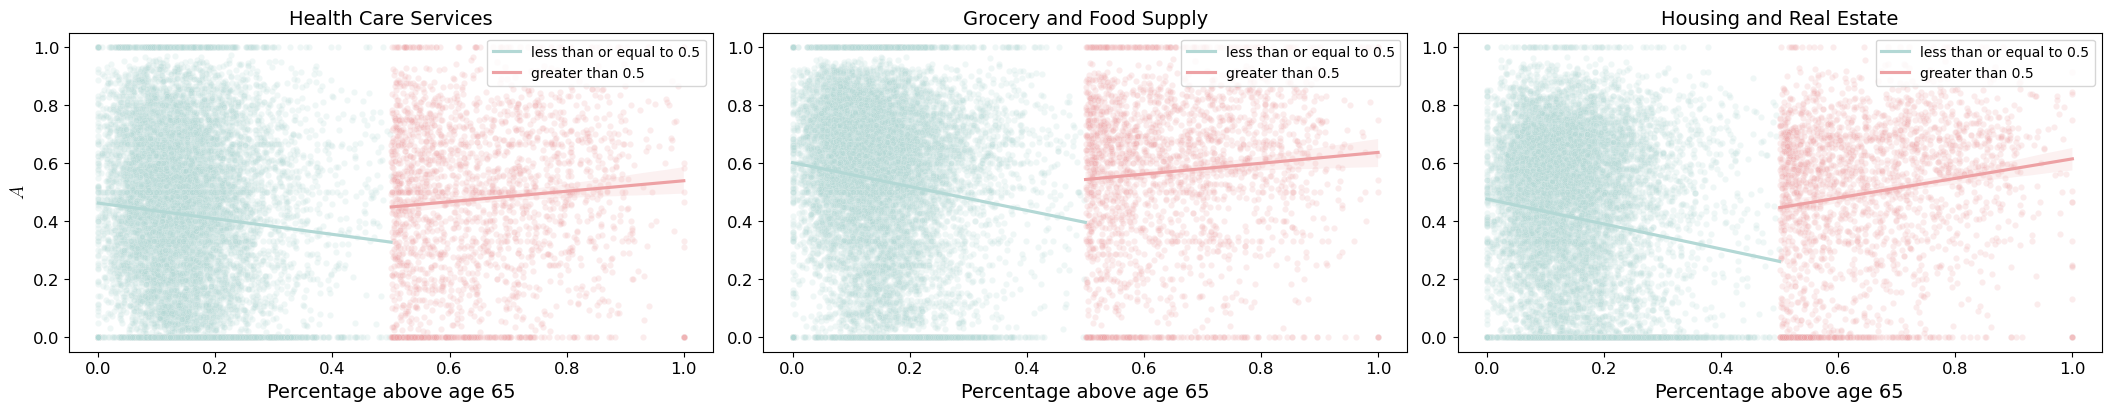

In [188]:
#HGH

import matplotlib.pyplot as plt
import seaborn as sns  

ctype='_5 miles'

fig, ax=plt.subplots(1,3,constrained_layout=True, figsize=(21, 4))#



palette=plt.get_cmap('tab20c')

colors=['#B3D8D5', '#EDA1A4']
cmap=ListedColormap(colors)



for j,key in enumerate(['Health Care Services','Grocery and Food Supply','Housing and Real Estate']):
    df1=dfAll[dfAll['ParentType']==key]


    categories = df1['age'].unique()
    
    if j==0:
        hloc=(0.5,0.6)
    elif j==1:
        hloc=(0.6,0.7)
    else:
        hloc=(0.45,0.65)

    # For each category, create a regplot and scatterplot
    for i,category in enumerate(categories):
       
        
        # Subset the data to only this category
        df_subset = df1[df1['age'] == category]

        # Sample the subset if it's for scatter points
        df_sample = df_subset.sample(frac=0.05)
        #df_sample1 = df_subset.sample(frac=0.001)
        df_sample2 = df_subset.sample(frac=0.5)

        # Plot the regression line (from the full subset)
        
        
        
        if i==0:
            print(category)
            sn=sns.regplot(data=df_subset , x="percent_above_65", y='AccRatio'+ctype,scatter=False, ax=ax[j],
                           color=colors[0],label=category, scatter_kws={'linewidths': 5})
           
            
            # Plot the scatter points (from the sampled subset)
            sn=sns.scatterplot(data=df_sample, x="percent_above_65", y='AccRatio'+ctype, 
                        alpha=0.2,color=colors[0], ax=sn,legend=True,s=20)     
            sn.legend(loc='upper right')
            
        else:
            sn=sns.regplot(data=df_sample2 , x="percent_above_65", y='AccRatio'+ctype,scatter=False, ax=sn,
                           color=colors[1],label=category, scatter_kws={'linewidths': 5})
           

            # Plot the scatter points (from the sampled subset)
            sn=sns.scatterplot(data=df_subset, x="percent_above_65", y='AccRatio'+ctype, 
                        color=colors[1],alpha=0.2, ax=sn,legend=True,s=20)  
            sn.legend(loc='upper right')
    

    

    
    sn.set_title(key,fontsize=14)
    if j>0:
        sn.set(ylabel=None)
    else:
     
        sn.set_ylabel(r'$A$', fontsize=14, usetex=True)  # 设置y轴标题大小     
        
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=12)  # 设置x y轴标签大小
   
    
    sn.set_xlabel('Percentage above age 65', fontsize=14)  # 设置x轴标题大小
plt.show()      

In [189]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/AccRatios/{}.png'.format('HGH_A_grouped_age'),dpi=600,
           bbox_inches='tight')

plot US FL AZ CA accratio distributions in two groups

In [615]:
dfT['age']=dfT.apply(lambda x: 'greater than 0.5' if x['percent_above_65']>0.5 else 'less than or equal to 0.5',
                             axis=1)
dfT['is_old']=dfT.apply(lambda x: 1 if x['percent_above_65']>0.5 else 0,
                             axis=1)



In [5]:
dfT

,census_block_group,population_by_age,percent_above_65,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,age,is_old
0,10010201001,745,0.036242,0.574468,0.786667,0.625000,AL,less than or equal to 0.5,0
1,10010201002,1265,0.114625,0.280000,0.443709,0.286689,AL,less than or equal to 0.5,0
2,10010202001,960,0.161458,0.655172,0.809524,0.694611,AL,less than or equal to 0.5,0
3,10010202002,1236,0.094660,0.666667,0.702128,0.741007,AL,less than or equal to 0.5,0
4,10010203001,2364,0.134095,0.292135,0.696629,0.438953,AL,less than or equal to 0.5,0
...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,0.226927,0.000000,1.000000,0.615385,PR,less than or equal to 0.5,0
220329,721537506012,2703,0.107658,0.181818,0.666667,0.257143,PR,less than or equal to 0.5,0
220330,721537506013,1195,0.057741,0.000000,1.000000,0.200000,PR,less than or equal to 0.5,0
220331,721537506021,2005,0.220449,2.000000,2.000000,0.277778,PR,less than or equal to 0.5,0


t-test

In [10]:
from scipy.stats import ttest_ind, shapiro
state='FL'
for state in ['FL','AZ','CA']:
    print(state)
    for tp in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:
        g2=dfT[(dfT['state']==state)&(dfT['age']=='less than or equal to 0.5')&(dfT[tp+'_accratio5m']<1.1)][tp+'_accratio5m']  
        g1=dfT[(dfT['state']==state)&(dfT['age']=='greater than 0.5')&(dfT[tp+'_accratio5m']<1.1)][tp+'_accratio5m']
        t_st,p_va=ttest_ind(g1,g2,equal_var=False)
        print(t_st,p_va)
print('US')
for tp in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:
    g2=dfT[(dfT['age']=='less than or equal to 0.5')&(dfT[tp+'_accratio5m']<1.1)][tp+'_accratio5m']  
    g1=dfT[(dfT['age']=='greater than 0.5')&(dfT[tp+'_accratio5m']<1.1)][tp+'_accratio5m']
    t_st,p_va=ttest_ind(g1,g2,equal_var=False)
    print(t_st,p_va)

FL
5.32709430375484 1.23848389870715e-07
5.169175940346307 2.842423684322174e-07
6.641315473564486 5.0687866056370825e-11
AZ
0.8997170478637935 0.3689761265038456
-0.8401359599694362 0.4014940945158566
1.664878558426804 0.09692779571937164
CA
-1.8074785361557806 0.07207204703547027
-3.603416669842732 0.00039008492319559377
-0.6875401181020008 0.49246341714869424
US
7.8295515084892635 7.403063693771476e-15
5.266385672876792 1.5201043845045095e-07
14.090240089790647 2.484987004308255e-43


In [352]:
#read data

dfGroup=dfT
dfGroup['census_block_group']=dfGroup['census_block_group'].astype('int64')


#dfGroup=dfGroup[dfGroup['Health Care Services_accratio5m']<1.1]
#dfGroup=dfGroup[dfGroup['Grocery and Food Supply_accratio5m']<1.1]
#dfGroup=dfGroup[dfGroup['Housing and Real Estate_accratio5m']<1.1]

df_HCS=dfGroup[['census_block_group','Health Care Services_accratio5m','state','age']]
df_HCS=df_HCS.rename(columns={'Health Care Services_accratio5m':'accratio5m'})
df_HCS['type']='Health Care Services'
df_GFS=dfGroup[['census_block_group','Grocery and Food Supply_accratio5m','state','age']]
df_GFS=df_GFS.rename(columns={'Grocery and Food Supply_accratio5m':'accratio5m'})
df_GFS['type']='Grocery and Food Supply'
df_HRE=dfGroup[['census_block_group','Housing and Real Estate_accratio5m','state','age']]
df_HRE=df_HRE.rename(columns={'Housing and Real Estate_accratio5m':'accratio5m'})
df_HRE['type']='Housing and Real Estate'

dfG=pd.concat([df_HCS,df_GFS,df_HRE])

In [353]:
dfG[dfG['age']=='greater than 0.5']

,census_block_group,accratio5m,state,age,type
53,10030107014,0.244444,AL,greater than 0.5,Health Care Services
94,10030114012,0.031496,AL,greater than 0.5,Health Care Services
121,10030116021,0.122222,AL,greater than 0.5,Health Care Services
313,10159819011,0.000000,AL,greater than 0.5,Health Care Services
1232,10730016003,0.757576,AL,greater than 0.5,Health Care Services
...,...,...,...,...,...
219438,721130724003,0.000000,PR,greater than 0.5,Housing and Real Estate
219768,721270055004,2.000000,PR,greater than 0.5,Housing and Real Estate
219961,721270105001,0.408163,PR,greater than 0.5,Housing and Real Estate
220235,721455605001,0.500000,PR,greater than 0.5,Housing and Real Estate


In [355]:
import numpy as np
stateshowlist=['FL','AZ','CA']
alist=[]
for state in stateshowlist:
    for tp in dfG['type'].unique():
        for ag in dfG['age'].unique():
            alist.append([state,ag,tp,np.median(dfG[(dfG['age']==ag)&(dfG['type']==tp)&(dfG['state']==state)]['accratio5m'])])
dfGG=pd.DataFrame(alist,columns=['state','age','type','median_accratio5m'])      

小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18


C:\Users\Linao\AppData\Local\Temp\ipykernel_28020\3034092228.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


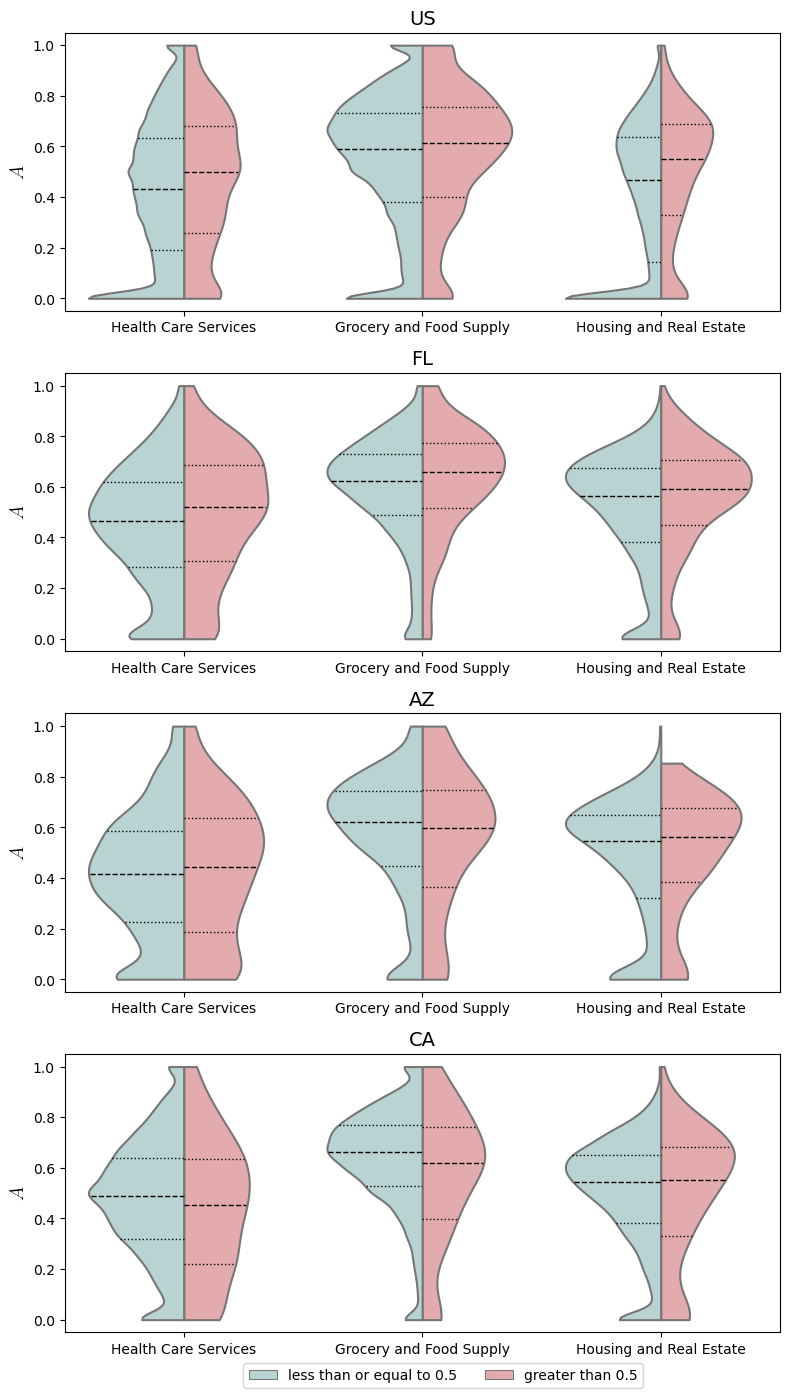

In [363]:
#plot
fig, ax=plt.subplots(4,1,constrained_layout=True, figsize=(8, 14))#

colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

#colors=['#42BCB2', '#197AB7']
#cmap=ListedColormap(colors)

sn=sns.violinplot(x='type',y='accratio5m',hue='age',hue_order=['less than or equal to 0.5','greater than 0.5'],
                  data=dfG[dfG['accratio5m']<1.1],ax=ax[0],palette=colors,cut=0.0,inner="quartiles",split=True)

# 获取四分位数线
quartile_lines = [line for line in ax[0].lines if line.get_linestyle() == '--']

# 输出四分位数线的个数
print("小提琴图中的四分位数线数量为：", len(quartile_lines))
# 设置四分位数线的颜色、粗细和样式
for k,line in enumerate(quartile_lines):
    if k%3==1:
        line.set_color('black')  # 设置颜色为红色
        line.set_linewidth(1)  # 设置线条粗细为2
        line.set_linestyle('--')  # 设置线条样式为点状线
    else:
        line.set_color('black')  # 设置颜色为红色
        line.set_linewidth(1)  # 设置线条粗细为2
        line.set_linestyle(':')  # 设置线条样式为点状线



sn.set_title('US',fontsize=14)
sn.set_xlabel('')
sn.set_ylabel(r'$A$', fontsize=14, usetex=True)
ax[0].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
sn.legend('',edgecolor='white')
#sn.legend(title='',fontsize='small',loc='upper right')
for i,state in enumerate(list(dfGG['state'].unique())):
    plotdata=dfG[(dfG['state']==state)& (dfG['accratio5m']<1.1)]
    sn=sns.violinplot(x='type',y='accratio5m',hue='age',hue_order=['less than or equal to 0.5','greater than 0.5'],
                      data=plotdata,ax=ax[i+1],palette=colors,cut=0.0,inner="quartiles",split=True)


    # 获取四分位数线
    quartile_lines = [line for line in ax[i+1].lines if line.get_linestyle() == '--']

    # 输出四分位数线的个数
    print("小提琴图中的四分位数线数量为：", len(quartile_lines))
    # 设置四分位数线的颜色、粗细和样式
    for k,line in enumerate(quartile_lines):
        if k%3==1:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle('--')  # 设置线条样式为点状线
        else:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle(':')  # 设置线条样式为点状线
    
    sn.set_title(state,fontsize=14)
    sn.set_xlabel('')
    sn.set_ylabel(r'$A$', fontsize=14, usetex=True)
    if i<2:
        sn.legend('',edgecolor='white')
        
    else:
        sn.legend(title='',ncol=2,loc=(0.25,-0.2))
    ax[i+1].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
fig.tight_layout()

In [364]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/AccRatios/{}.png'.format('3states_Med_A_grouped'),dpi=300,
           bbox_inches='tight')